<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Decision_Trees_Ensemble_Learning_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.tree import export_graphviz

## Classification

In [ ]:
# Read dataset

dataset = pd.read_csv('Human_Resources.csv')
dataset.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

<AxesSubplot:xlabel='left', ylabel='count'>

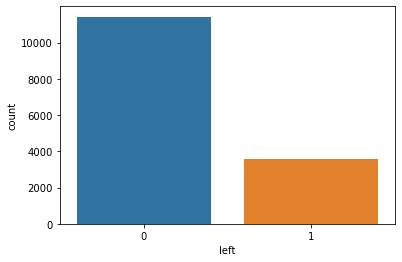

/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/tpot/builtins/__

In [ ]:
sns.countplot(x='left',data=dataset)

pd.read_csv('Human_Resources.csv'): Laadt de dataset in.

sns.countplot(): Maakt een eenvoudige staafdiagram om de distributie van het left kenmerk te bekijken, wat waarschijnlijk aangeeft of een werknemer het bedrijf heeft verlaten (1) of niet (0).



In [ ]:
# one-hot encoding

dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)

y = dataset['left'].values
X = dataset.drop(['left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

print(X_test.shape)

# To avoid conversion warning:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)



(4000, 20)


Uitleg:

X: Alle kenmerken behalve de target (left).

y: Alleen de target (left).

train_test_split(): Splits de data in een trainingsset en een testset, waarbij 4000 samples worden gebruikt voor de testset.

random_state=0 zorgt voor reproduceerbare resultaten.

Schalen van de data met StandardScaler om ervoor te zorgen dat elke feature een gemiddelde van 0 en een standaarddeviatie van 1 heeft. Dit is vooral belangrijk voor modellen zoals LogisticRegression en SVM.



Uitleg:

Verandert categorische variabelen (department, salary) naar numerieke dummy-variabelen met pd.get_dummies().

Dit is nodig voor veel machine learning modellen die alleen numerieke invoer accepteren.

In [ ]:
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

Best accuracy :  0.7887085038653934
Best parameters : {'C': 100.001, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2847  235]
 [ 597  321]]
79.2


Uitleg:

Voert hyperparameter tuning uit met GridSearchCV voor een LogisticRegression model.

Test verschillende C waarden (regularisatieparameter) en kiest de beste combinatie van hyperparameters op basis van nauwkeurigheid (accuracy).

Gebruikt 5-voudige cross-validatie (cv=5).



Voorspelt de testset met het beste model uit de grid search.

Drukt de precisie, recall, F1-score en nauwkeurigheid (accuracy) af.

Toont de verwarringsmatrix (confusion_matrix) om de classificatieprestaties te evalueren.



In [ ]:
# Decision tree

DTclassifier = DecisionTreeClassifier(class_weight='balanced')
DTclassifier.fit(X_train,y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3082
           1       0.94      0.97      0.96       918

    accuracy                           0.98      4000
   macro avg       0.97      0.98      0.97      4000
weighted avg       0.98      0.98      0.98      4000

[[3023   59]
 [  24  894]]
97.925


Uitleg:

Model Initialisatie:

class_weight='balanced' zorgt ervoor dat de beslisboom de minderheidsklasse (left = 1) niet onderschat door gewichten toe te voegen op basis van de klasse-frequentie.

Training:

De beslisboom wordt getraind op de geschaalde trainingsdata (X_train, y_train).

Evaluatie:

Voorspellingen worden gedaan voor de testset (X_test) en de resultaten worden geëvalueerd met een classificatierapport, verwarringsmatrix en nauwkeurigheidsscore.

In [ ]:
# Visualize the decision tree
export_graphviz(DTclassifier, out_file='tree.dot',
                feature_names =list(dataset.columns[0:-1]) ,
                class_names = ['no','yes'],
                rounded = True, proportion = False,
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook

from IPython.display import Image

Image(filename = 'tree.png')



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.18085 to fit


Uitleg:

Exporteren als DOT Bestand:

Exporteert de boomstructuur naar een DOT-bestand (tree.dot) dat later kan worden omgezet naar een afbeelding (tree.png).

DOT naar PNG:

Gebruikt een systeemcommando (dot) om de DOT-bestand naar PNG om te zetten, vereist Graphviz.

Weergeven in Jupyter:

Toont de gegenereerde beslisboom als afbeelding.



In [ ]:
# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




[0.3580859  0.12069288 0.08739624 0.12123191 0.28234841 0.00218148
 0.00064002 0.00119005 0.00131422 0.0013991  0.00147907 0.00079791
 0.00110297 0.00069975 0.00311943 0.00286618 0.00490147 0.00130097
 0.00444749 0.00280455]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3074    8]
 [  23  895]]
99.225


Uitleg:

Initialisatie:

n_estimators=500: Bouwt een bos van 500 beslisbomen.

max_features=13: Beperkt het maximale aantal kenmerken dat elke beslisboom kan zien tijdens splitsing.

class_weight='balanced': Zorgt voor gewichtsaanpassing om de minderheidsklasse te compenseren.

Feature Importance:

Drukt de relatieve belangrijkheid van elke feature af.

Evaluatie:

Voorspelt en evalueert de prestaties op de testset

In [ ]:
# Bagging with logistic regression

number_of_estimators = 50
complexity = 1e8
cart = LogisticRegression(C=complexity,solver='liblinear')


lregbagging = BaggingClassifier(base_estimator=cart, n_estimators=number_of_estimators)

lregbagging.fit(X_train,y_train)


y_pred = lregbagging.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.66      4000
weighted avg       0.77      0.79      0.77      4000

[[2844  238]
 [ 593  325]]
79.225


Uitleg:

Initialisatie:

Bouwt een bagging classifier met LogisticRegression als basismodel.

C=1e8: Hoge regularisatie om de logistische regressie bijna ongecontroleerd te maken (dicht bij een pure lineaire scheiding).

Training en Evaluatie:

Trained het model en evalueert de prestaties met standaard classificatiemetrics.



In [ ]:
# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3082
           1       0.93      0.92      0.92       918

    accuracy                           0.96      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000

[[3018   64]
 [  77  841]]
96.475


Uitleg:

Initialisatie:

n_estimators=50: Bouwt een ensemble van 50 zwakke leerlingen.

learning_rate=0.90: Gewicht van elke leerling bij de uiteindelijke voorspelling.

Training en Evaluatie:

Trained het model en evalueert de prestaties.

In [ ]:
# Adaboost with logistic regression classifier

cart = LogisticRegression(C=1000,solver='liblinear')
logreg_adaboost = AdaBoostClassifier(base_estimator=cart,n_estimators=50,learning_rate=0.9)
logreg_adaboost.fit(X_train,y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3082
           1       0.51      0.27      0.35       918

    accuracy                           0.77      4000
   macro avg       0.66      0.59      0.61      4000
weighted avg       0.74      0.77      0.74      4000

[[2841  241]
 [ 672  246]]
77.17500000000001


Uitleg:

Initialisatie:

Gebruikt LogisticRegression als basismodel in plaats van de standaard beslisboom.

Training en Evaluatie:

Voert dezelfde stappen uit als de standaard AdaBoostClassifier.

In [ ]:
# Gradient boosting

clf_gradientboost = GradientBoostingClassifier(n_estimators=600,learning_rate=0.95)

clf_gradientboost.fit(X_train,y_train)


y_pred = clf_gradientboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.96      0.97      0.97       918

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[[3047   35]
 [  24  894]]
98.52499999999999


Uitleg:

Initialisatie:

n_estimators=600: Groot aantal bomen om een complex model te bouwen.

learning_rate=0.95: Snelheid waarmee elke boom bijdraagt aan de uiteindelijke voorspelling.

Training en Evaluatie:

Standaard training en evaluatie.



In [ ]:
#### Classification with XGBoost

from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=1000,max_depth=15)
clf_xgb.fit(X_train,y_train)

y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.98      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3066   16]
 [  23  895]]
99.02499999999999


Uitleg:

Initialisatie:

n_estimators=1000: Zeer groot aantal bomen voor maximale nauwkeurigheid.

max_depth=15: Diepe bomen voor meer complexiteit.

Training en Evaluatie:

Zeer krachtige gradient boosting techniek.



In [ ]:
# Stacking



estimators = [
    ('svc', SVC(C=10,kernel='rbf')),
    ('nb' , GaussianNB()),
    ('rfc', RandomForestClassifier(n_estimators = 100))
]

lr = LogisticRegression()

stacked_model = StackingClassifier(
estimators=estimators, final_estimator=lr,cv=5,n_jobs=-1)

stacked_model.fit(X_train,y_train)


y_pred = stacked_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[[3069   13]
 [  31  887]]
98.9


Uitleg:

Initialisatie:

Bouwt een StackingClassifier met drie basismodellen:

SVC (Support Vector Classifier) met een RBF-kernel.

GaussianNB (Naive Bayes).

RandomForestClassifier met 100 bomen.

Gebruikt LogisticRegression als final estimator, die de voorspellingen van de basismodellen combineert.

cv=5 zorgt voor 5-voudige cross-validatie voor een robuuster model.

Training en Evaluatie:

Trained het stacking model en evalueert de prestaties zoals gewoonlijk.



In [ ]:
stacked_model.transform(X_test)

array([[ 9.23770457e-01,  6.97232721e-01,  1.00000000e+00],
       [-2.89609818e+00,  3.72273586e-01,  0.00000000e+00],
       [-2.86886948e+00,  6.94188302e-05,  0.00000000e+00],
       ...,
       [-2.70702727e+00,  3.29530113e-01,  0.00000000e+00],
       [-1.62473351e+00,  5.98661852e-01,  0.00000000e+00],
       [-1.51899626e+00,  7.25138012e-01,  2.00000000e-02]])

Uitleg:

Deze regel laat toe om de voorspellingen van de basismodellen te bekijken voordat ze worden gecombineerd door de finale LogisticRegression classifier.

Dit kan nuttig zijn voor foutenanalyse of feature engineering.

In [ ]:
# TPOT

from tpot import TPOTClassifier

TP_model = TPOTClassifier(generations=5, population_size=20, cv=5, n_jobs = -1,scoring='accuracy')

TP_model.fit(X_train,y_train)

y_pred = TP_model.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

TP_model.export('best_TP_Model.py')

/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.97      0.97      0.97       918

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

[[3052   30]
 [  30  888]]
98.5


Uitleg:

Automated Machine Learning:

TPOTClassifier gebruikt genetische algoritmes om het beste model en hyperparameters te vinden.

Initialisatie:

generations=5: Het aantal generaties van evolutie.

population_size=20: Het aantal modellen in elke generatie.

Model Export:

Exporteert de beste gevonden pipeline naar een Python-bestand (best_TP_Model.py).

Evaluatie:

Print de prestaties van het beste model en de evaluatie van alle individuele modellen.



In [ ]:
TP_model.evaluated_individuals_

{'XGBClassifier(LogisticRegression(input_matrix, LogisticRegression__C=0.1, LogisticRegression__dual=False, LogisticRegression__penalty=l2), XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=4, XGBClassifier__min_child_weight=1, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.4, XGBClassifier__verbosity=0)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 2,
  'internal_cv_score': 0.9754523130348506},
 'DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=17)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.9772705361941378},
 'BernoulliNB(input_matrix, BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)': {'generation': 0,
  'mutation_

## Regression

### Split criterium

In [ ]:
dataset = pd.read_csv('Golf.csv')
dataset.head(14)

Day   Outlook  Temp Humidity    Wind  Players
0     1     Sunny   Hot     High    Weak       25
1     2     Sunny   Hot     High  Strong       30
2     3  Overcast   Hot     High    Weak       46
3     4      Rain  Mild     High    Weak       45
4     5      Rain  Cool   Normal    Weak       52
5     6      Rain  Cool   Normal  Strong       23
6     7  Overcast  Cool   Normal  Strong       43
7     8     Sunny  Mild     High    Weak       35
8     9     Sunny  Cool   Normal    Weak       38
9    10      Rain  Mild   Normal    Weak       46
10   11     Sunny  Mild   Normal  Strong       48
11   12  Overcast  Mild     High  Strong       52
12   13  Overcast   Hot   Normal    Weak       44
13   14      Rain  Mild     High  Strong       30

In [ ]:
# Split Outlook

# Variance of the number of players before splitting

var_tot = dataset['Players'].var()
print('Total variance:', var_tot)

# split outlook (Sunny, Overcast en Rain)
var_sunny = dataset[dataset['Outlook']=='Sunny'].Players.var()
nr_sunny = dataset[dataset['Outlook']=='Sunny'].Players.count()
print('Sunny:','variance:',var_sunny,' count:',nr_sunny)

var_overcast = dataset[dataset['Outlook']=='Overcast'].Players.var()
nr_overcast = dataset[dataset['Outlook']=='Overcast'].Players.count()
print('Overcast:','variance:',var_overcast,' count:',nr_overcast)

var_rain = dataset[dataset['Outlook']=='Rain'].Players.var()
nr_rain = dataset[dataset['Outlook']=='Rain'].Players.count()
print('Rain:','variance:',var_sunny,' count:',nr_sunny)

var_comb = ((nr_sunny*var_sunny) + (nr_overcast*var_overcast) + (nr_rain*var_rain))/dataset['Players'].count()

print('weighted variance after splitting:', var_comb)

# Split wind

var_weak = dataset[dataset['Wind']=='Weak'].Players.var()
nr_weak = dataset[dataset['Wind']=='Weak'].Players.count()
print('weak wind:','variance:',var_weak,' count:',nr_weak)

var_strong = dataset[dataset['Wind']=='Strong'].Players.var()
nr_strong = dataset[dataset['Wind']=='Strong'].Players.count()
print('strong wind:','variance:',var_strong,' count:',nr_strong)

var_comb = ((nr_weak*var_weak) + (nr_strong*var_strong))/dataset['Players'].count()
print('weighted variance after splitting:', var_comb)

# Prediction based on outlook

print('average when sunny:', dataset[dataset['Outlook']=='Sunny'].Players.mean() )
print('average when cloudy:', dataset[dataset['Outlook']=='Overcast'].Players.mean() )
print('average when rainy:', dataset[dataset['Outlook']=='Rain'].Players.mean() )

Total variance: 93.56593406593407
Sunny: variance: 75.69999999999999  count: 5
Overcast: variance: 16.25  count: 4
Rain: variance: 75.69999999999999  count: 5
weighted variance after splitting: 84.42857142857143
weak wind: variance: 70.83928571428571  count: 8
strong wind: variance: 134.66666666666669  count: 6
weighted variance after splitting: 98.1938775510204
average when sunny: 35.2
average when cloudy: 46.25
average when rainy: 39.2


Uitleg:

Doel:

Beoordeelt de kwaliteit van een mogelijke splitsing op basis van de variantie.

Splitsen op 'Outlook':

Berekent de gewogen variantie na het splitsen op Outlook (Sunny, Overcast, Rain).

Een lagere gewogen variantie betekent een betere splitsing.



### Boston housing dataset

In [ ]:
dataset = pd.read_csv('boston_housing.csv')
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

          PT           B  LSTAT       Price  
0  15.300000  396.899994   4.98  504.000000  
1  17.799999  396.899994   9.14  453.600008  
2  17.799999  392.829987   4.03  728.700016  
3  18.700001  394.630005   2.94  701.400032  
4  18.700001  396.899994   5.33  760.200016

In [ ]:
dataset.drop('CHAS', axis=1, inplace=True)
# Training set / test set

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

features = list(dataset.columns[:dataset.columns.size-1])
print(features)
X = dataset[features].values
y= dataset['Price'].values

# Opdelen in training en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']


Uitleg:

Data Voorbereiding:

Laadt de boston_housing.csv dataset in en verwijdert de CHAS kolom (binary feature).

Outlier Verwijdering:

Gebruikt Z-scores om outliers te verwijderen.

Feature Engineering:

Maakt hogere-orde (polynomiale) features aan voor complexere regressiemodelle

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


# Higher order features
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# Ridge regression
lregmodel_poly = Ridge(alpha=5,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score on test set with L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score on training set with L2: ',lregmodel_poly.score(X_train_poly,y_train))



# Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score on test set with L1: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 op de trainingset
print('R2 score on training set with L1: ',lregmodel_poly.score(X_train_poly,y_train))

dimensie van X_train_poly:  (295, 91)
dimensie van X_test_poly:  (146, 91)
R2 score on test set with L2:  0.8280172944518217
R2 score on training set with L2:  0.8961369699471798
R2 score on test set with L1:  0.8592830757971248
R2 score on training set with L1:  0.8761987185666626


/home/wouter/miniconda3/envs/tensorflow2/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647428.7717571727, tolerance: 965.10547830971
  model = cd_fast.enet_coordinate_descent(


Uitleg:

Ridge (L2) en Lasso (L1) Regressie:

Ridge (L2) voegt een kwadratische strafterm toe om overfitting te voorkomen.

Lasso (L1) voegt een absolute strafterm toe en kan features compleet elimineren (sparse solution).



In [ ]:
# Random Forest Regressor

RFR_model = RandomForestRegressor(n_estimators=150)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)

0.899279603972506

Uitleg:

Random Forest Regressie:

Gebruikt 150 bomen voor regressie op de polynomiale features.

Evaluatie:

Drukt de R² score af om de kwaliteit van de voorspellingen te beoordelen.